In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/COVID_19_Datasets/master/csse_covid_19_daily_reports_us.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


* we can see that columns (Confirmed, Deaths, Recoered, Active, FIPS, Incident_rate, people_hospitalized) are heavily skewed as evident from the describe table

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

* none of the categorical variable have null values and we can impute the numeric variables with the mean or the mode depending on which is appropriate

In [6]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [7]:
# change the date format
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

In [8]:
# unique values in last update
df['Last_Update'].unique()

array(['2020-05-21T02:32:54.000000000'], dtype='datetime64[ns]')

All the entries have been updated on the same day, so date doesnt make any difference

In [9]:
df['Country_Region'].unique()

array(['US'], dtype=object)

There are no error entries for country region

In [10]:
df['ISO3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [11]:
unique_states = df['Province_State'].unique()
len(unique_states)

58

There are totally 58 different provinces

In [12]:
unique_states

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
df['FIPS'].unique()

array([    1,     2,    60,     4,     5,     6,     8,     9,    10,
       88888,    11,    12,    13, 99999,    66,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    69,    39,    40,    41,    42,    72,
          44,    45,    46,    47,    48,    49,    50,    78,    51,
          53,    54,    55,    56], dtype=int64)

There are few outliers

In [14]:
df['UID'].unique()

array([84000001, 84000002,       16, 84000004, 84000005, 84000006,
       84000008, 84000009, 84000010, 84088888, 84000011, 84000012,
       84000013, 84099999,      316, 84000015, 84000016, 84000017,
       84000018, 84000019, 84000020, 84000021, 84000022, 84000023,
       84000024, 84000025, 84000026, 84000027, 84000028, 84000029,
       84000030, 84000031, 84000032, 84000033, 84000034, 84000035,
       84000036, 84000037, 84000038,      580, 84000039, 84000040,
       84000041, 84000042,      630, 84000044, 84000045, 84000046,
       84000047, 84000048, 84000049, 84000050,      850, 84000051,
       84000053, 84000054, 84000055, 84000056], dtype=int64)

In [15]:
df['ISO3'].value_counts()

USA    53
PRI     1
MNP     1
ASM     1
GUM     1
VIR     1
Name: ISO3, dtype: int64

# EDA

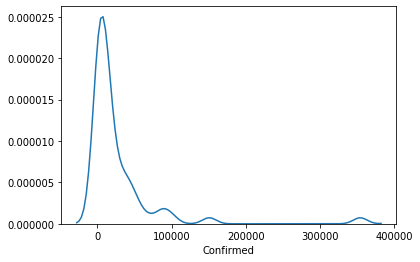

In [16]:
sns.distplot(df['Confirmed'], hist = False )

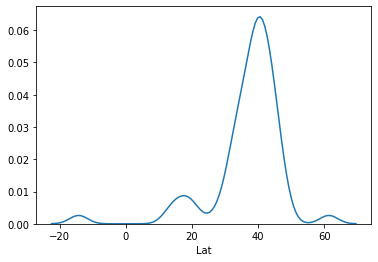

In [17]:
sns.distplot(df['Lat'], hist = False)

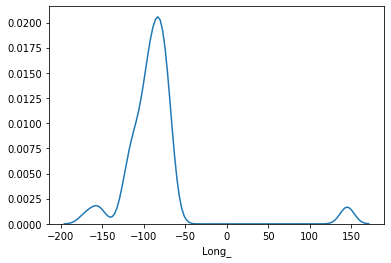

In [18]:
sns.distplot(df['Long_'], hist = False)

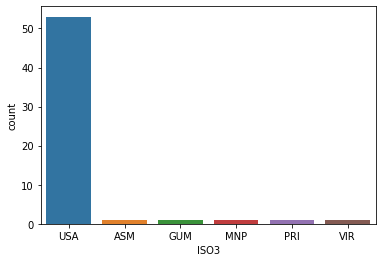

In [19]:
sns.countplot(df['ISO3'])

# Filling missing values

In [20]:
# we can impute the missing values in latitude and longitude column with their mean value
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

In [21]:
mean = df['Lat'].mean()

In [22]:
df['Lat'].fillna(mean, inplace = True)

In [23]:
mean2 = df['Long_'].mean()

In [24]:
df['Long_'].fillna(mean2, inplace = True)

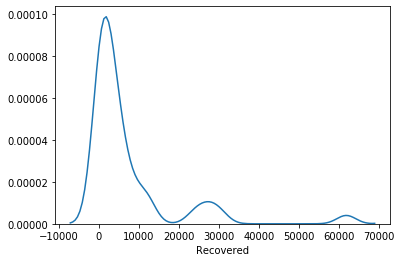

In [25]:
sns.distplot(df['Recovered'], hist = False)

In [26]:
df['Recovered'].fillna(df['Confirmed']+df['Deaths']-df['Active'], inplace = True)

In [27]:
df['People_Tested'].fillna(df['People_Tested'].mean(), inplace = True)

In [28]:
df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(), inplace = True)

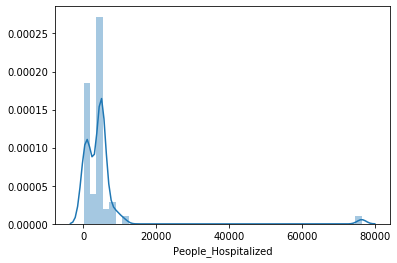

In [29]:
sns.distplot(df['People_Hospitalized'])

In [30]:
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(), inplace = True)

In [31]:
df['Testing_Rate'].fillna(df['Testing_Rate'].mean(), inplace = True)

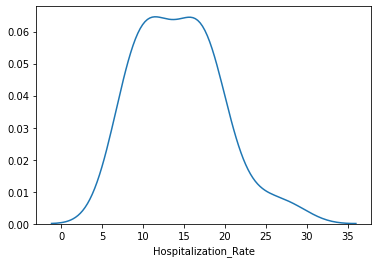

In [32]:
sns.distplot(df['Hospitalization_Rate'], hist = False)

since the hospitalization rate data is normally distributed we can impute it with mean 

In [33]:
df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(), inplace = True)

In [34]:
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(), inplace = True)

In [35]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

Now all the missing values have been filled with mean

# Removing Outliers

In [36]:
cols =['Lat', 'Long_', 'Confirmed',  'Recovered',  'Active',  'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate', ]

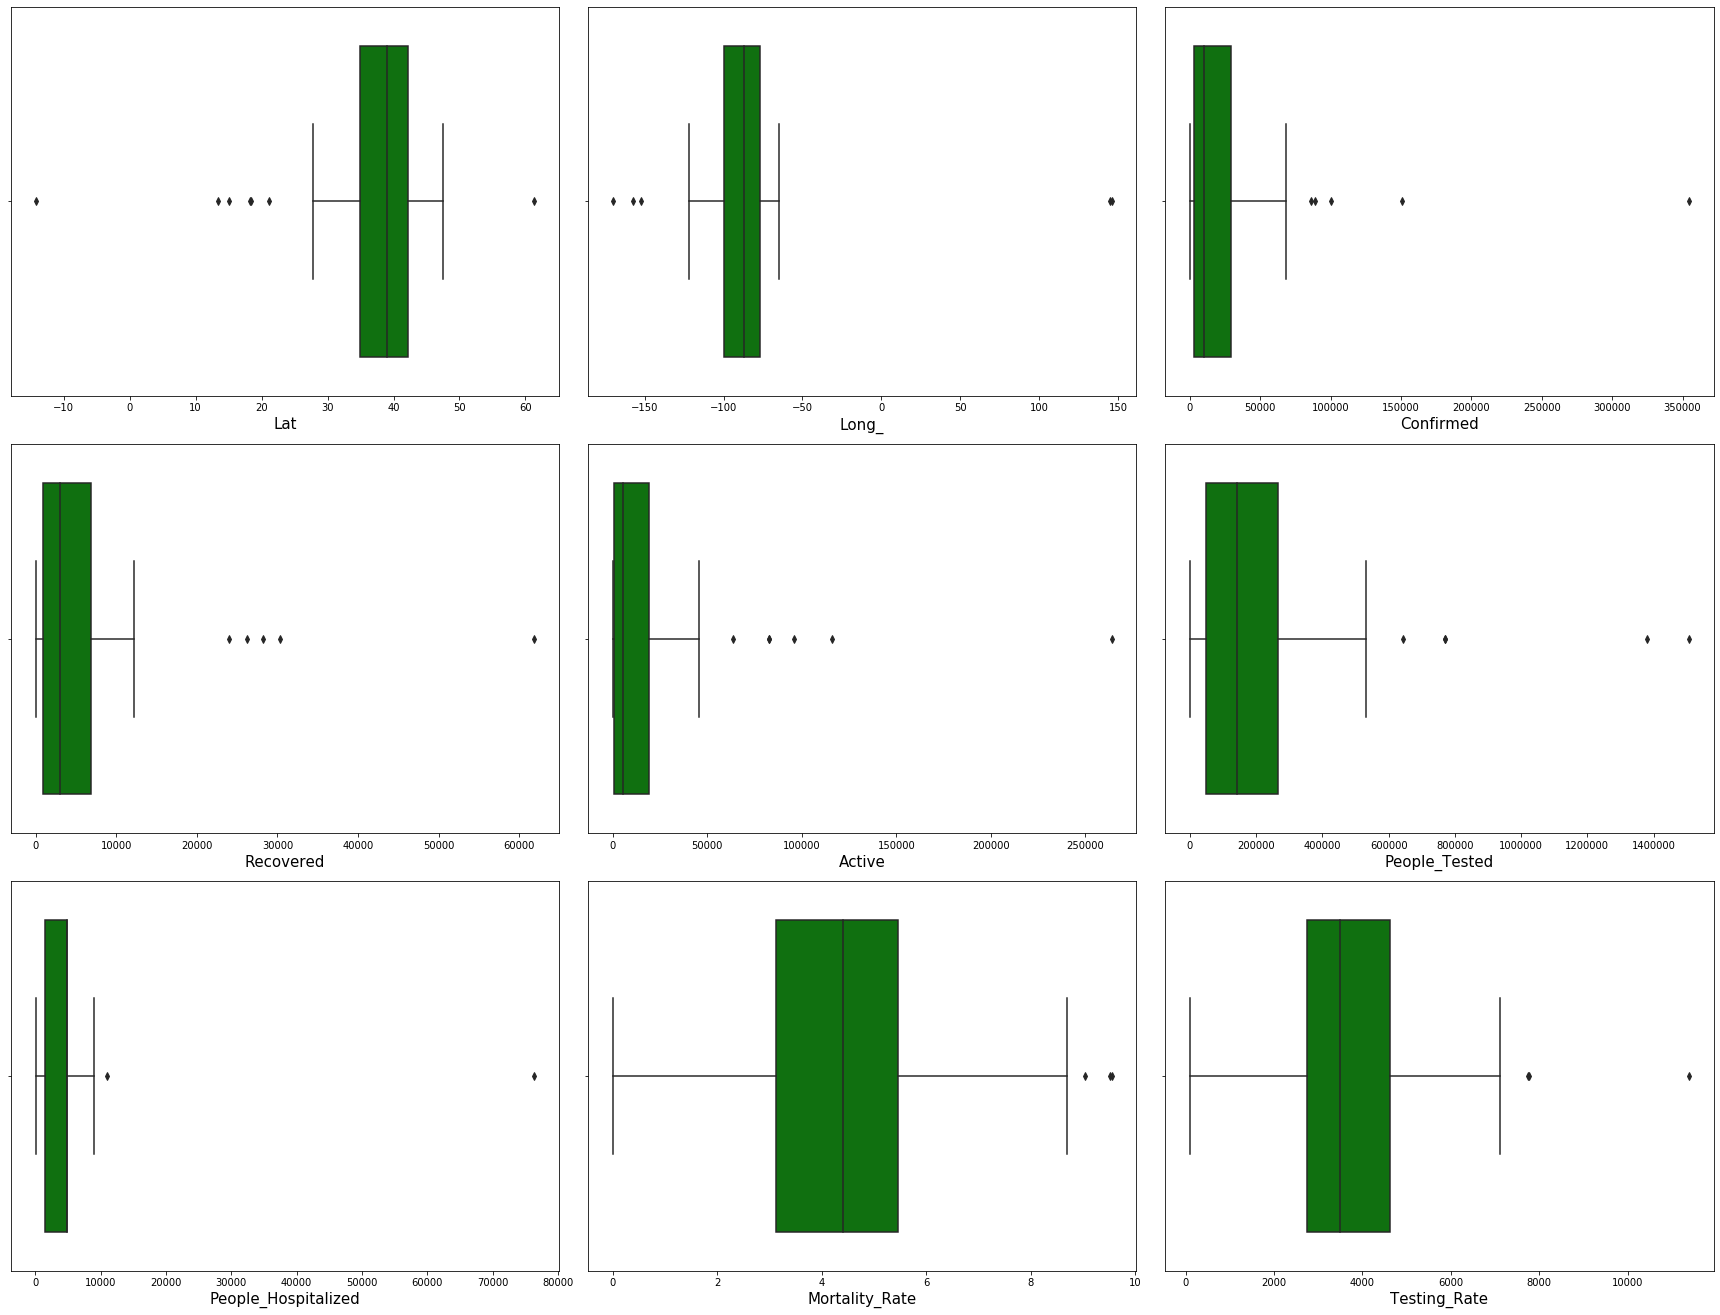

In [37]:
plt.figure(figsize=(24,30))
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    ax = sns.boxplot(df[cols[i]], orient='h', color = "green")
    ax.set_xlabel(cols[i],fontsize=15)
    plt.tight_layout()

As evident from the boxplots all columns have outliers

In [38]:
# using zscore method of elimination of outliers
temp_df = df[cols]
threshold = 3
temp_df.head()

,Lat,Long_,Confirmed,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate
0,32.3182,-86.9023,13052,1044.0,12530.0,164450.0,1493.000000,3.999387,3353.942386
1,61.3707,-152.4044,401,352.0,39.0,37045.0,4897.454545,2.493766,5063.940017
2,-14.2710,-170.1320,0,0.0,0.0,124.0,4897.454545,4.458248,222.857246
3,33.7298,-111.4312,14906,3773.0,10386.0,165435.0,1792.000000,5.011405,2272.859351
4,34.9697,-92.3731,5003,3852.0,1044.0,96258.0,535.000000,2.138717,3189.670370


In [39]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([ 2,  5, 14, 36, 36, 36, 36, 36, 39, 45], dtype=int64),
 array([0, 5, 1, 2, 3, 4, 5, 6, 1, 8], dtype=int64))

In [40]:
df_new = df[(z<threshold).all(axis=1)]
df_new

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.318200,-86.902300,13052,522,1044.0,12530.0,1,266.194321,164450.000000,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.370700,-152.404400,401,10,352.0,39.0,2,54.815493,37045.000000,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.729800,-111.431200,14906,747,3773.0,10386.0,4,204.788838,165435.000000,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.969700,-92.373100,5003,107,3852.0,1044.0,5,165.782801,96258.000000,535.000000,2.138717,84000005,USA,3189.670370,10.693584
6,Colorado,US,2020-05-21 02:32:54,39.059800,-105.311100,22797,1299,3478.0,18020.0,8,395.868121,131837.000000,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.597800,-72.755400,39017,3529,6264.0,29224.0,9,1094.357902,190718.000000,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.318500,-75.507100,8194,310,3965.0,3919.0,10,841.476990,45412.000000,4897.454545,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,US,2020-05-21 02:32:54,36.840089,-85.206614,49,0,0.0,49.0,88888,396.230806,225853.410714,4897.454545,0.000000,84088888,USA,3894.186870,14.342541
10,District of Columbia,US,2020-05-21 02:32:54,38.897400,-77.026800,7551,407,1059.0,6085.0,11,1069.927127,40419.000000,4897.454545,5.390015,84000011,USA,5727.106946,14.342541
11,Florida,US,2020-05-21 02:32:54,27.766300,-81.686800,47471,2096,4192.0,45375.0,12,221.024217,771348.000000,8934.000000,4.415327,84000012,USA,3591.383953,18.819911


In [41]:
df_new.shape

(52, 18)

In [42]:
# percentage of data lost
(58-df_new.shape[0])/58

0.10344827586206896

* Data loss is more than 5% try IQR method

In [43]:
q1 = temp_df.quantile(0.25)
q3 = temp_df.quantile(0.75)
iqr = q3-q1
iqr

Lat                         7.341275
Long_                      22.625150
Confirmed               26799.500000
Recovered                5956.000000
Active                  18478.750000
People_Tested          217215.602679
People_Hospitalized      3442.954545
Mortality_Rate              2.334750
Testing_Rate             1880.742883
dtype: float64

In [44]:
df_new1 = df[~ ( (temp_df<(q1-1.5*iqr)) | (temp_df>(q3+1.5*iqr)) ).any(axis=1)]
df_new1.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,1044.0,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,USA,4663.552976,14.342541


In [45]:
# percentage loss of data
(58-df_new1.shape[0])/58

0.3448275862068966

Data loss is too much in IQR method of removal, so adjust threshold in Zscore method

In [46]:
threshold = 4
z1 = np.abs(zscore(temp_df))
np.where(z1>threshold)

(array([ 2, 14, 36, 36, 36, 36, 36, 39], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 1], dtype=int64))

In [47]:
df_new2 = df[(z1<threshold).all(axis=1)]
#Percentage of data lost
((len(df)-len(df_new2))/len(df))*100

6.896551724137931

In [48]:
df_new2.reset_index(inplace=True,drop=True)

In [49]:
df_new2.drop(['Province_State', 'Country_Region', 'Last_Update', 'ISO3'], inplace = True, axis=1)

# Correlation

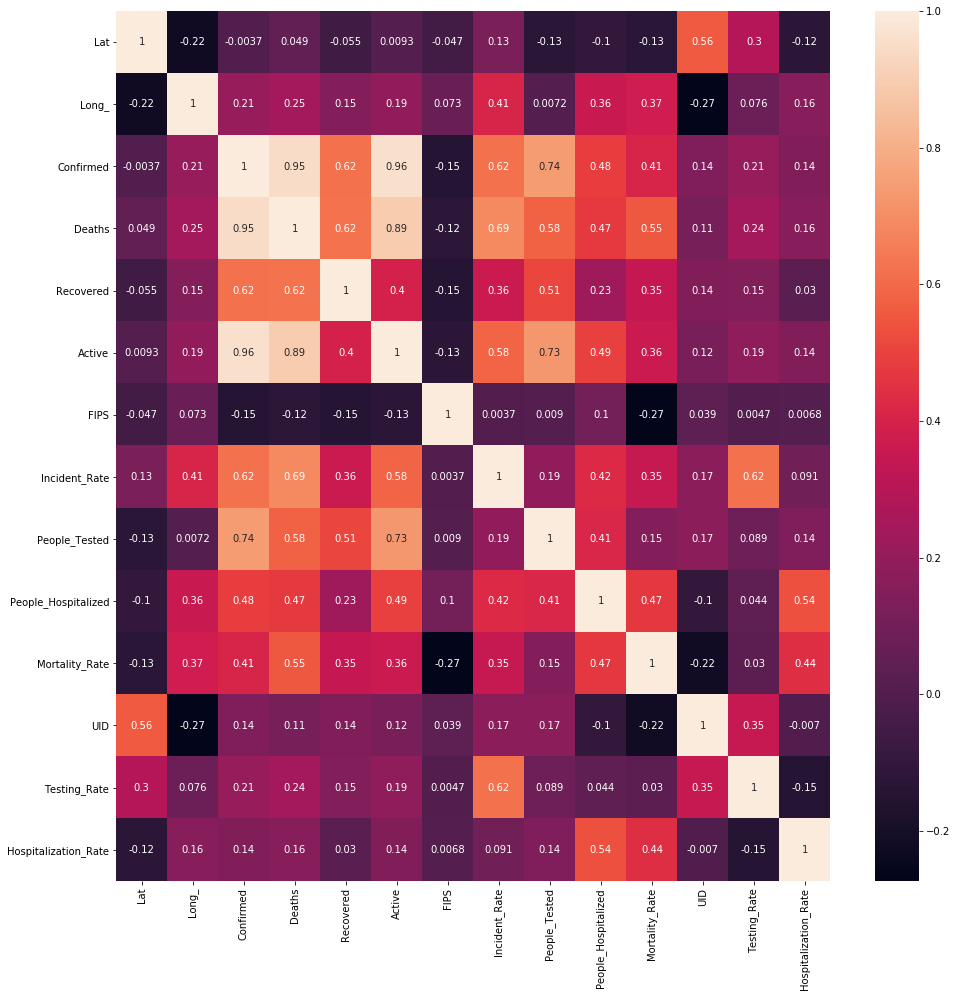

In [50]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new2.corr(),annot=True)

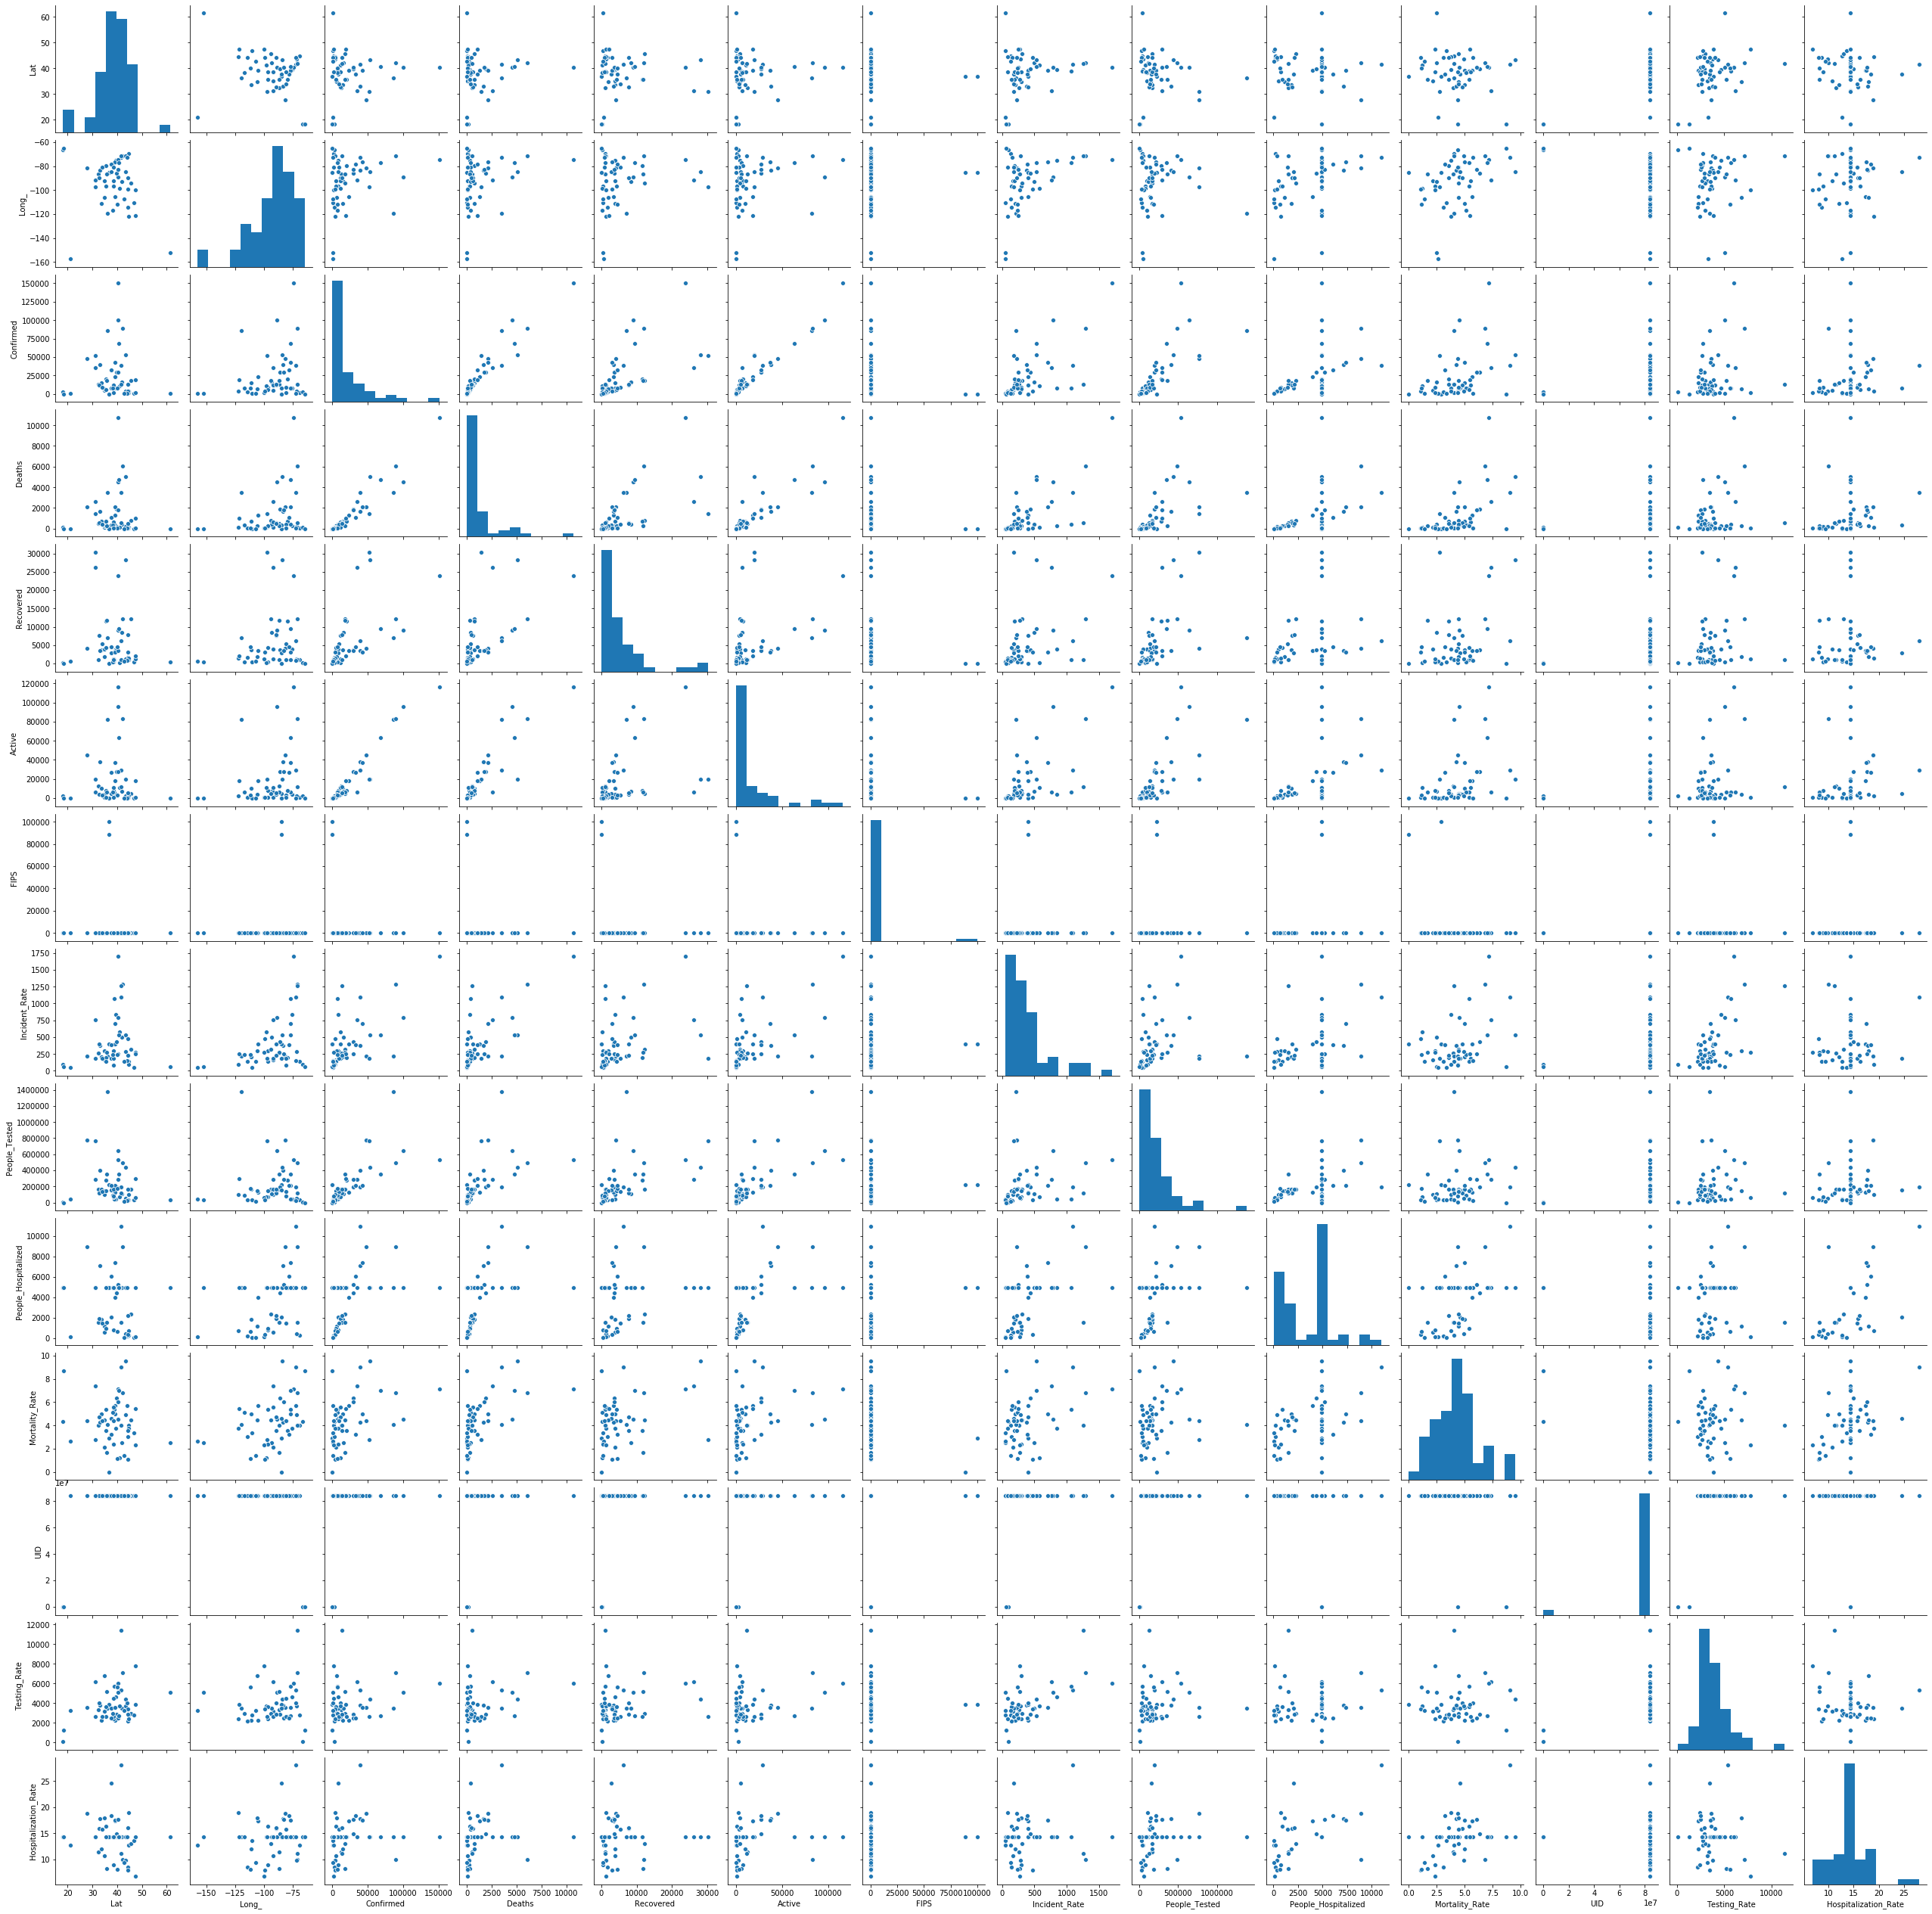

In [51]:
sns.pairplot(df_new2)

# Skewness

In [53]:
x = df_new2.drop(['Deaths', 'Recovered'],axis=1).copy()
y = df_new2.loc[:,'Recovered'].copy()

In [54]:
y.shape

(54,)

In [55]:
df_new2.shape

(54, 14)

In [56]:
x.shape

(54, 12)

In [57]:
df_new2.isnull().sum()

Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [58]:
df_new2.skew()

Lat                    -0.479795
Long_                  -1.332479
Confirmed               2.364981
Deaths                  2.907813
Recovered               2.264923
Active                  2.339850
FIPS                    5.073304
Incident_Rate           1.887974
People_Tested           2.720771
People_Hospitalized     0.428192
Mortality_Rate          0.415516
UID                    -5.044103
Testing_Rate            1.685236
Hospitalization_Rate    0.902371
dtype: float64

* Most of the columns have skewness

In [59]:
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[['Long_', 'Confirmed', 'Active', 'Incident_Rate', 'People_Tested','Testing_Rate', 'Hospitalization_Rate' ]],method='yeo-johnson'))
transf.rename({0: 'Long_',1: 'Confirmed',2: 'Active',3: 'Incident_Rate',4:'People_Tested',5:'Testing_Rate',6: 'Hospitalization_Rate'}, axis=1, inplace = True)
x.drop(['Long_', 'Confirmed', 'Active', 'Incident_Rate', 'People_Tested','Testing_Rate', 'Hospitalization_Rate'],axis=1 ,inplace=True)
x = pd.concat((x, transf), axis=1)
x

,Lat,FIPS,People_Hospitalized,Mortality_Rate,UID,Long_,Confirmed,Active,Incident_Rate,People_Tested,Testing_Rate,Hospitalization_Rate
0,32.318200,1,1493.000000,3.999387,84000001,0.100773,0.131777,0.435926,-0.061080,0.132480,-0.198450,-0.712314
1,61.370700,2,4897.454545,2.493766,84000002,-2.153933,-1.539611,-1.690956,-1.917575,-1.041313,0.762683,0.122827
2,33.729800,4,1792.000000,5.011405,84000004,-1.112315,0.221509,0.328696,-0.374633,0.138036,-0.922456,-0.534234
3,34.969700,5,535.000000,2.138717,84000005,-0.236433,-0.449865,-0.739840,-0.625822,-0.336107,-0.301060,-0.948770
4,36.116200,6,4897.454545,4.066421,84000006,-1.390865,1.658602,1.726510,-0.302002,2.681653,-0.113357,0.122827
5,39.059800,8,3955.000000,5.698118,84000008,-0.871826,0.525096,0.653561,0.417049,-0.067909,-0.910410,0.876147
6,41.597800,9,10946.000000,9.044775,84000009,1.258577,0.947954,0.964895,1.661095,0.272625,0.908238,2.999202
7,39.318500,10,4897.454545,3.783256,84000010,0.992943,-0.164551,-0.176166,1.337068,-0.903593,0.552279,0.122827
8,36.840089,88888,4897.454545,0.000000,84088888,0.215764,-2.105955,-1.641403,0.418157,0.438462,0.124452,0.122827
9,38.897400,11,4897.454545,5.390015,84000011,0.855810,-0.213780,0.041386,1.633185,-0.983150,1.095831,0.122827


In [60]:
x.drop(['FIPS', 'UID'], inplace = True, axis=1)

In [61]:
x.shape

(54, 10)

In [62]:
y.shape

(54,)

# Model Building

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{'alpha':[200, 250, 275, 300, 500]}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8,50,100,150,200], 
                                 'min_samples_leaf':[1,2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsRegressor(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan']
                                      }
                            }
}

In [66]:
max_scr = 0

for r_s in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        r2 = r2_score(y_test,pred_test)
        if r2 > max_scr:
            max_scr = r2
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)

Model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score :  0.9459828168292513
Random State :  99
